<a href="https://colab.research.google.com/github/bhargabdhungel/woc_machine_learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# importing data from drive
raw_training_data = pd.read_csv('/content/drive/MyDrive/woc/linear_regression_data/Linear_train.csv')
raw_testing_data = pd.read_csv('/content/drive/MyDrive/woc/linear_regression_data/Linear_test.csv')
training_data=raw_training_data.to_numpy()
testing_data=raw_testing_data.to_numpy()

In [29]:
def hypothesis(x_train,theta):
  return x_train@theta

In [30]:
def cost_function(x_train,y,theta,m):
  hypo=hypothesis(x_train,theta)
  difference = hypo-y
  cost = ((hypo-y).transpose() @ (hypo-y)) / (2*m)
  return cost[0][0]

In [31]:
theta=np.ones((21,1))
m=len(training_data)
alpha=1
iter=200

In [32]:
# training data
x=training_data[:,1:21]
mean=np.mean(x, axis=0)
maxs=np.amax(x,axis=0)
mins=np.amin(x,axis=0)
ranges=maxs-mins
ones=np.ones((m,1))
x=(x-mean)/ranges
x_train=np.hstack((ones,x))
y_train=training_data[:,21]
y_train=y_train.reshape((m,1))

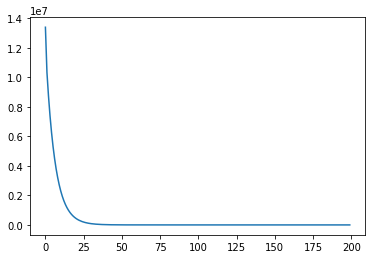

In [33]:
# gradient descent
y_p=[]
for it in range(iter):
  y_p.append(cost_function(x_train,y_train,theta,m))
  diff=hypothesis(x_train,theta)-y_train
  theta=theta-  (alpha/m) * (x_train.transpose() @ diff)
plt.plot(y_p)

In [34]:
# testing data
x=testing_data[:,1:21]
ones=np.ones((10000,1))
x=(x-mean)/ranges
x_test=np.hstack((ones,x))
y_test=testing_data[:,21]
y_test=y_test.reshape((10000,1))

In [35]:
# prediction
prediction=hypothesis(x_test,theta)
rmse = (((y_test-prediction).T@(y_test-prediction))/10000)**0.5
rmse[0][0]

1.8289540668716695